In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split   # import for splitting the data
from sklearn.linear_model import LinearRegression      # import for linear regression
from sklearn.model_selection import GridSearchCV 

In [4]:
Bikedemand = pd.read_csv('/content/SeoulBikeData.csv', encoding= 'unicode_escape') # pull data
data = pd.DataFrame(Bikedemand)
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# Drop Date Column
data.drop(labels = 'Date', axis = 1, inplace = True)
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# Encode categorical data
from sklearn.preprocessing import LabelEncoder

In [7]:
df_clean = data.copy()
label_encoder = LabelEncoder()
df_clean['Seasons'] = label_encoder.fit_transform(data['Seasons'])
df_clean['Holiday'] = label_encoder.fit_transform(data['Holiday'])
df_clean['Functioning Day'] = label_encoder.fit_transform(data['Functioning Day'])
df_clean

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,1
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,1
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,1
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,1


In [8]:
features_names = data.columns.to_list()[1:]
X = df_clean[features_names] # features
Y = df_clean['Rented Bike Count'] # response or target variable
features_names

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0) # Prepare test and train data

In [10]:
my_linear_regression = LinearRegression()   # Develop Linear Regression model
my_linear_regression.fit(X_train, Y_train) 

LinearRegression()

In [11]:
pred = my_linear_regression.predict(X_test)  # Test and evaluate model
pred

array([ 449.11023441,  802.09773806,  524.98978197, ..., 1316.7190132 ,
          6.7721274 , 1126.59527908])

In [12]:
import matplotlib.pyplot as plt

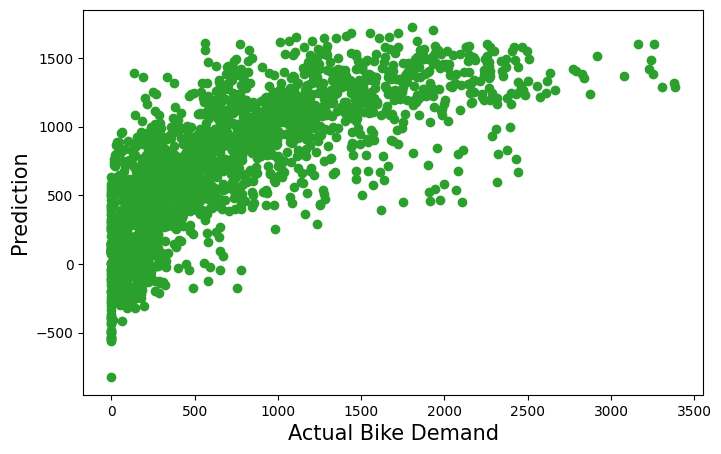

In [13]:
# Scatter plot to measure goodness of fit
plt.figure(figsize = (8, 5))
plt.scatter(x = Y_test, y = pred, color = 'Tab:green')
plt.xlabel('Actual Bike Demand', fontsize = 15)
plt.ylabel('Prediction', fontsize = 15)
plt.show()

In [22]:
# Defining coefficients for each of the variables
print('The intercept (b_0) is  {}'.format(my_linear_regression.intercept_))
for i in range(len(features_names)):
  print('The coef (b_{}) is  {}'.format(i+1, my_linear_regression.coef_[i]))

The intercept (b_0) is  -146.31922682488027
The coef (b_1) is  27.046661102611072
The coef (b_2) is  17.559930045900664
The coef (b_3) is  -10.879365559591697
The coef (b_4) is  17.67581309339104
The coef (b_5) is  0.025322551285075434
The coef (b_6) is  12.674342064361701
The coef (b_7) is  -80.31604984140569
The coef (b_8) is  -55.36315708841856
The coef (b_9) is  30.820260068251955
The coef (b_10) is  -99.5521380245056
The coef (b_11) is  132.46106215591007
The coef (b_12) is  938.0132761747262


In [14]:
print('The model r2 score is: {}'.format(my_linear_regression.score(X_train, Y_train)))

The model r2 score is: 0.5503798581556488


The regression model is able to predict approximately 55% of the Rented Bike Count (Demand).